In [ ]:
# prompt: install matplotib

!pip install matplotlib


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import keras

from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [ ]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

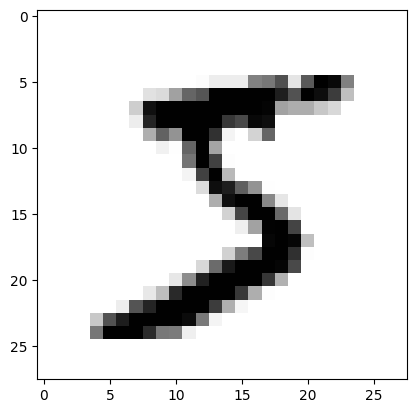

In [ ]:
plt.imshow(X_train[0],cmap='binary')

In [ ]:
#Normalizing the data
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

#Reshaping the data
X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)

#convert to one hot vectors
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [ ]:
X_train.shape
X_test.shape
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
#building a model
model = Sequential()

model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

In [ ]:
optimizer=keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
model.compile(optimizer=optimizer , loss=keras.losses.categorical_crossentropy , metrics=['accuracy',keras.metrics.Precision(),keras.metrics.Recall(),keras.metrics.F1Score()])

In [ ]:
#callbacks

from keras.

In [ ]:
his=model.fit(X_train,y_train,epochs=5,batch_size=64,validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 65s 82ms/step - loss: 0.1856 - accuracy: 0.9445 - precision: 0.9669 - recall: 0.9241 - f1_score: 0.9442 - val_loss: 0.0587 - val_accuracy: 0.9837 - val_precision: 0.9859 - val_recall: 0.9812 - val_f1_score: 0.9836
Epoch 2/5
750/750 [==============================] - 68s 91ms/step - loss: 0.0519 - accuracy: 0.9843 - precision: 0.9863 - recall: 0.9825 - f1_score: 0.9842 - val_loss: 0.0570 - val_accuracy: 0.9834 - val_precision: 0.9850 - val_recall: 0.9817 - val_f1_score: 0.9833
Epoch 3/5
 50/750 [=>............................] - ETA: 52s - loss: 0.0385 - accuracy: 0.9872 - precision: 0.9881 - recall: 0.9853 - f1_score: 0.9870

In [ ]:
y_prediction=model.predict(X_test)
y_prediction=np.argmax(y_prediction,axis=1)
y_test=np.argmax(y_test,axis=1)
result=confusion_matrix(y_test,y_prediction,normalize='pred')

In [ ]:
eval_metrics=model.evaluate(X_test,y_test)
print("Test Accuracy:",eval_metrics[1])
print("Test Precision:",eval_metrics[2])
print("Test Recall:",eval_metrics[3])
print("Test F1Score:",eval_metrics[4])

313/313 [==============================] - 3s 11ms/step - loss: 0.0433 - accuracy: 0.9900 - precision_19: 0.9900 - recall_19: 0.9898 - f1_score: 0.9899
Test Accuracy: 0.9900000095367432
Test Precision: 0.9899979829788208
Test Recall: 0.989799976348877
Test F1Score: [0.99541986 0.9938381  0.9888078  0.99258524 0.991845   0.9871293
 0.99211764 0.988786   0.9857868  0.9831014 ]


In [ ]:
his.save("best.h5")

NameError: name 'his' is not defined